In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



In [2]:
data=pd.read_csv('./Mall_Customers.csv')

In [3]:
# punto 1 analisis exploratorio de los datos
data.head(20)

,identificacion,genero,edad,ingreso_anual,Puntuacion_gastos(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.describe()

,identificacion,edad,ingreso_anual,Puntuacion_gastos(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Valores faltantes o atipicos')

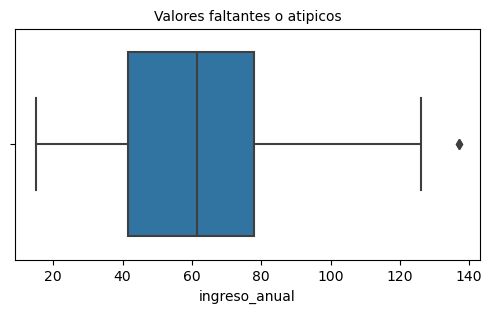

In [5]:
# Valores faltantes y atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['ingreso_anual'])
plt.title('Valores faltantes o atipicos', fontsize=10)

In [6]:
# identificar campos vacios o nulos
celdas_vacias = data.isnull().sum()
print(celdas_vacias)

identificacion              0
genero                      0
edad                        0
ingreso_anual               0
Puntuacion_gastos(1-100)    0
dtype: int64


In [7]:
#punto 2, Procesar los datos y limpiarlos 
print ("Registros en 0 de identificacion=", data ["identificacion"].isin([0]).sum())
print ("Registros en 0 de edad=", data ["edad"].isin([0]).sum())
print ("Registros en 0 de ingreso_anual=", data ["ingreso_anual"].isin([0]).sum())
print ("Registros en 0 de Puntuacion_gastos(1-100)=", data ["Puntuacion_gastos(1-100)"].isin([0]).sum())
# no se registran valores en 0


Registros en 0 de identificacion= 0
Registros en 0 de edad= 0
Registros en 0 de ingreso_anual= 0
Registros en 0 de Puntuacion_gastos(1-100)= 0


In [8]:
print("Cantidad de registros de Depresion_del_ST mayores a 135 es =", (data['ingreso_anual'] > 135).sum())

Cantidad de registros de Depresion_del_ST mayores a 135 es = 2


In [9]:
#Cambiamos los valores mayores a 135 por la media

media = data['ingreso_anual'].mean()
data.loc[data['ingreso_anual'] > 135, 'ingreso_anual'] = media

print("Cantidad de registros de ingreso_anual mayores a 135 es =", (data['ingreso_anual'] > 135).sum())

Cantidad de registros de ingreso_anual mayores a 135 es = 0


Text(0.5, 1.0, 'Valores faltantes o atipicos')

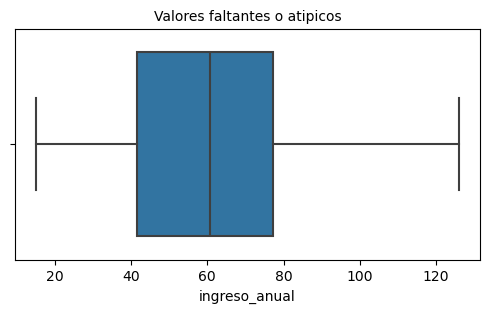

In [10]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['ingreso_anual'])
plt.title('Valores faltantes o atipicos', fontsize=10)

In [11]:
valorRmale = "Male"
valorMale = 1  
data['genero'] = data['genero'].replace(valorRmale, valorMale)

valorFmale = "Female"
valorFemale = 0
data['genero'] = data['genero'].replace(valorFmale, valorFemale)

#Se asigna valor de 1 para male
#Se asigna valor de 0 para Female

data.head(10)

,identificacion,genero,edad,ingreso_anual,Puntuacion_gastos(1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
5,6,0,22,17.0,76
6,7,0,35,18.0,6
7,8,0,23,18.0,94
8,9,1,64,19.0,3
9,10,0,30,19.0,72


In [12]:

#punto 3 Seleccion de caracteristicas mas relevantes

data=data[["edad","ingreso_anual","Puntuacion_gastos(1-100)"]]
data.head(10)

,edad,ingreso_anual,Puntuacion_gastos(1-100)
0,19,15.0,39
1,21,15.0,81
2,20,16.0,6
3,23,16.0,77
4,31,17.0,40
5,22,17.0,76
6,35,18.0,6
7,23,18.0,94
8,64,19.0,3
9,30,19.0,72


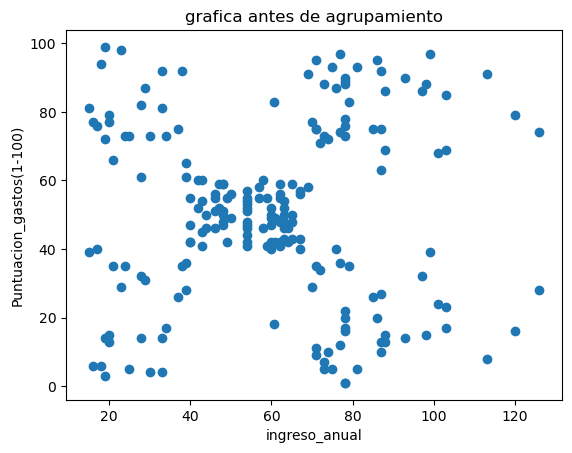

In [13]:
# grafica antes de agrupamiento

plt.scatter(data['ingreso_anual'],data['Puntuacion_gastos(1-100)'])
plt.xlabel('ingreso_anual')
plt.ylabel('Puntuacion_gastos(1-100)')
plt.title('grafica antes de agrupamiento')
plt.show()

In [14]:
#punto 4 Entrenar el modelo configurando los diferentes hiperparámetros



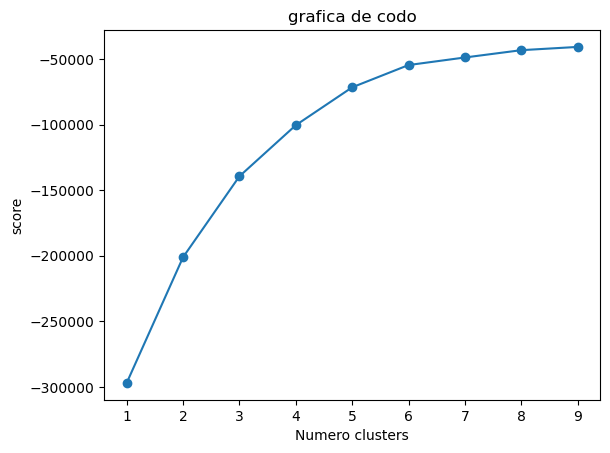

In [15]:
Nc = range(1,10)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(data).score(data)for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('Numero clusters')
plt.ylabel('score')
plt.title('grafica de codo')
plt.show()

In [16]:
Modelo=KMeans(n_clusters=7, random_state=0)
Modelo.fit(data)

KMeans(n_clusters=7, random_state=0)

In [17]:
#identificacion de los grupos
Modelo.labels_
data["Grupo"]=Modelo.labels_
print (data)

     edad  ingreso_anual  Puntuacion_gastos(1-100)  Grupo
0      19          15.00                        39      6
1      21          15.00                        81      4
2      20          16.00                         6      6
3      23          16.00                        77      4
4      31          17.00                        40      6
..    ...            ...                       ...    ...
195    35         120.00                        79      1
196    45         126.00                        28      2
197    32         126.00                        74      1
198    32          60.56                        18      2
199    30          60.56                        83      5

[200 rows x 4 columns]


In [18]:
# Punto 5 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

Observacion= len(data)
X = data.drop('Grupo',axis=1)
clusters=data['Grupo']

sil_score= silhouette_score(X, clusters)
calinski_score= calinski_harabasz_score(X,clusters)
davies_score= davies_bouldin_score(X,clusters)

table_data= [
    ["Numero de observaciones", Observacion],
    ["Coeficioente Silhouette", sil_score],
    ["Indice Calisnki Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

from tabulate import tabulate
print (tabulate(table_data, headers=["Metric", "Value"], tablefmt="pretty"))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de observaciones  |        200         |
| Coeficioente Silhouette  | 0.4380862913033072 |
| Indice Calisnki Harabasz | 163.9287211121766  |
|  Indice Davies Bouldin   | 0.7979867910546637 |
+--------------------------+--------------------+


In [19]:
# Punto 6.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

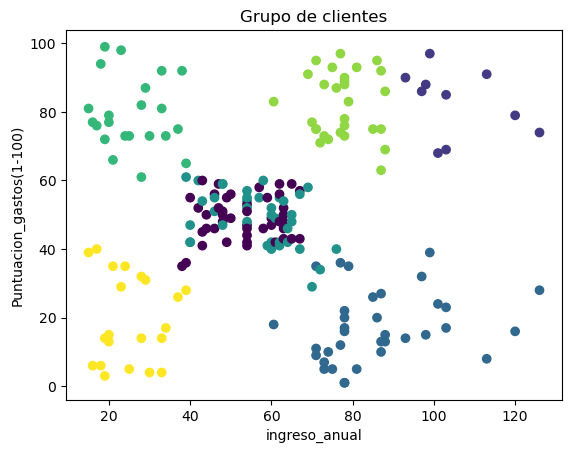

In [20]:
plt.scatter(data['ingreso_anual'],data['Puntuacion_gastos(1-100)'], c=data['Grupo'], cmap='viridis')
plt.xlabel('ingreso_anual')
plt.ylabel('Puntuacion_gastos(1-100)')
plt.title('Grupo de clientes')
plt.show()

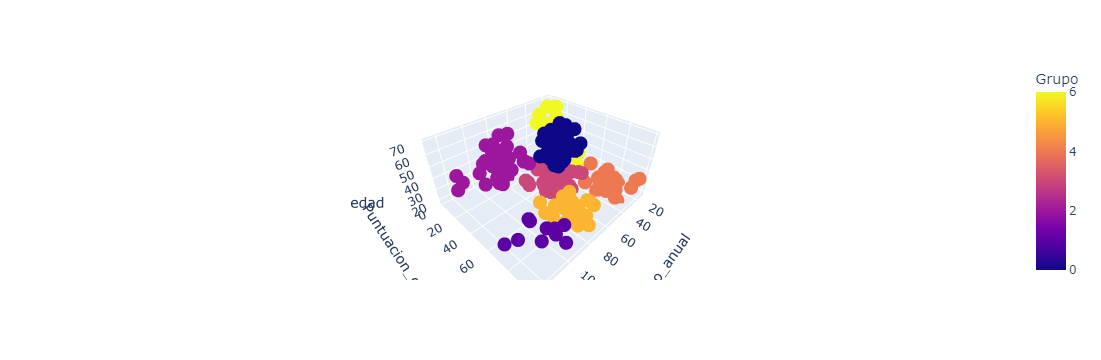

In [26]:
Grafica_3D = px.scatter_3d(
    data,
    x="ingreso_anual",
    y="Puntuacion_gastos(1-100)",
    z="edad",
    color="Grupo",
    symbol_map={0: "circle", 1: "circle", 2: "circle"},  
)


Grafica_3D.show()
